<a href="https://colab.research.google.com/github/vishant750/cardiovascular_risk_prediction/blob/main/cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title - Cardiovascular Risk Prediction**

## Project Type - Classification
## Contribution - Individual
## Individual Name - Vishant Kumar

# **Problem Description**

##Cardiovascular study on residents of the town of Fromingham,Massachusetts is given the aim of this classification project is to predict whether the patient has a 10-year risk of future coronary heart disease(CHD). The dataset provides the patients information. It includes over 4000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic behavioral and medical risk factors.

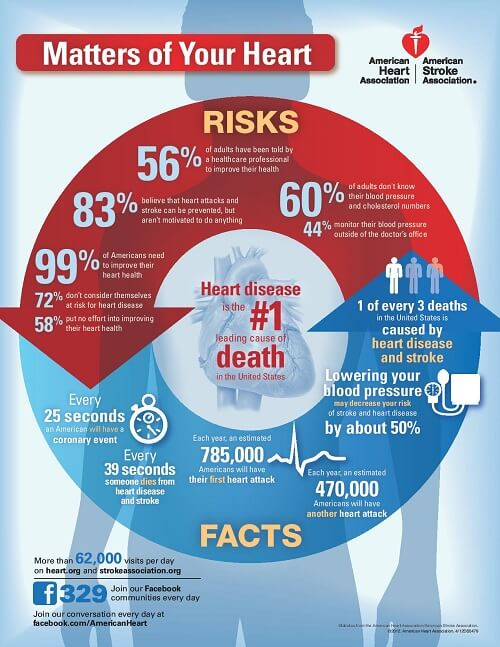

# **Data Description**

## The dataset contains potential cardiovascular attributes.The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. 


## Attributes Information-



## 1.   Sex - gender
## 2.   Age - age of the individual
## 3.   is_smoking - whether taking BP meds or not
## 4.   Cigs_per_day - the number of cigarettes that the person smoked on average in one day.
## 5.   BP_Meds - whether or not the patient was on blood pressure medication
## 6.   Prevalent Stroke - whether or not the patient had previously had a stroke 
## 7.   Prevalent Hyp - whether or not the patient was hypertensive 
## 8.   Diabetes - whether or not the patient had diabetes
## 9.   Tot Chol - total cholesterol level 
## 10.  Sys BP - systolic blood pressure
## 11.  Dia BP -diastolic blood pressure
## 12.  BMI - Body Mass Index
## 13.  Heart Rate - heart rate
## 14.  Glucose - glucose level
## 15.  TenYearCHD-10-year risk of coronary heart disease CHD


# **Initial preparation**

In [154]:
#Importing the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score

In [155]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
##Loading the data
cardiovascular_risk_pred=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv',index_col='id')

# **EDA**

In [157]:
#First 5 observation
cardiovascular_risk_pred

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [158]:
#Last 5 observations
cardiovascular_risk_pred.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [159]:
#Shape of the dataset
cardiovascular_risk_pred.shape

(3390, 16)

We have 3,390 observations and 16 columns

In [160]:
#Columns
cardiovascular_risk_pred.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [161]:
#Summary of the dataframe
cardiovascular_risk_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [162]:
#Statistical summary of dataframe
cardiovascular_risk_pred.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [163]:
#Checking the target variable
cardiovascular_risk_pred['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

## Which age group is most likely to have a higher CHD risk factor.


Text(0, 0.5, 'TenYearCHD')

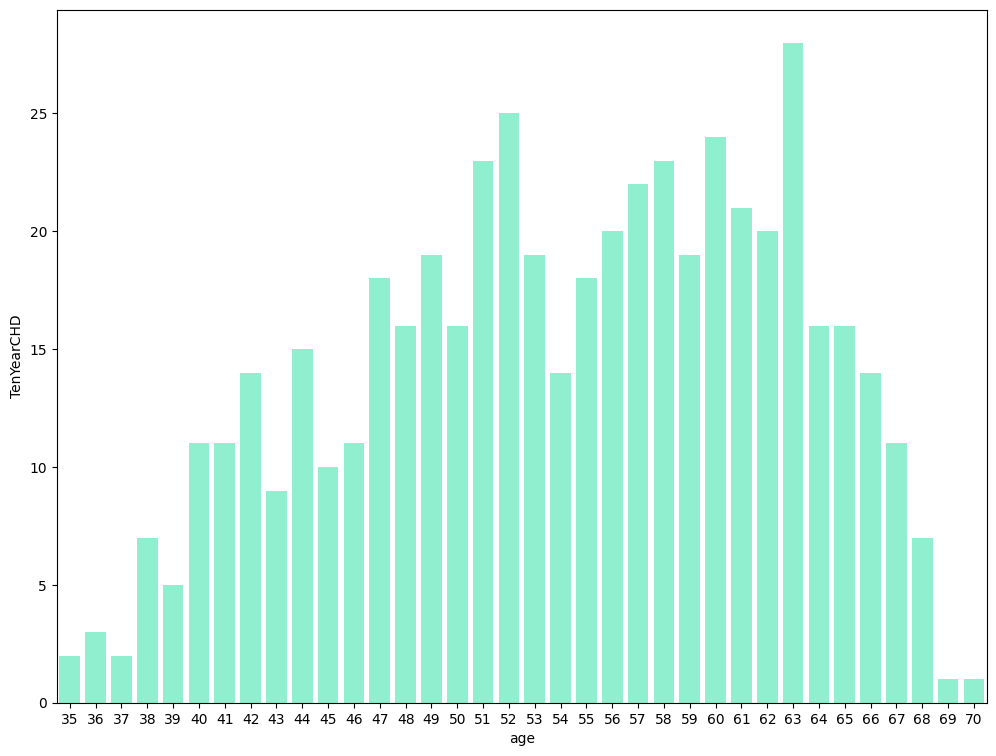

In [164]:
#Count for TenYearCHD vs age 
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['age'],color='aquamarine')
plt.ylabel('TenYearCHD')

### The age group at most risk to have positive CHD risk factor is 47 to 65.

## Does the education level affect the ten year CVD risk factor

Text(0, 0.5, 'TenYearCHD')

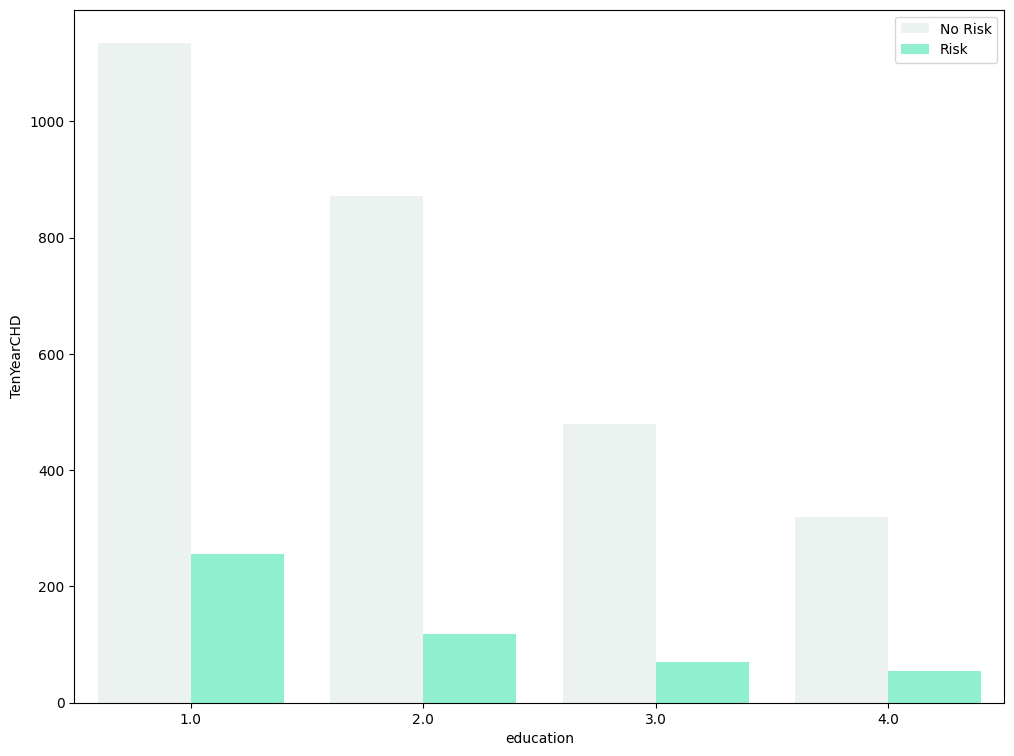

In [165]:
#Count for TenYearCHD vs age 
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x='education',color='aquamarine',hue='TenYearCHD')
plt.legend(["No Risk", "Risk"])
plt.ylabel('TenYearCHD')

### We can see that most number of 'At risk' cases are 1st level of education and least number of 'At risk' cases are 4th level.This is misleading result.

### What sex is most likely to suffer from high CHD

In [166]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['sex'].value_counts()

M    272
F    239
Name: sex, dtype: int64

Text(0, 0.5, 'TenYearCHD')

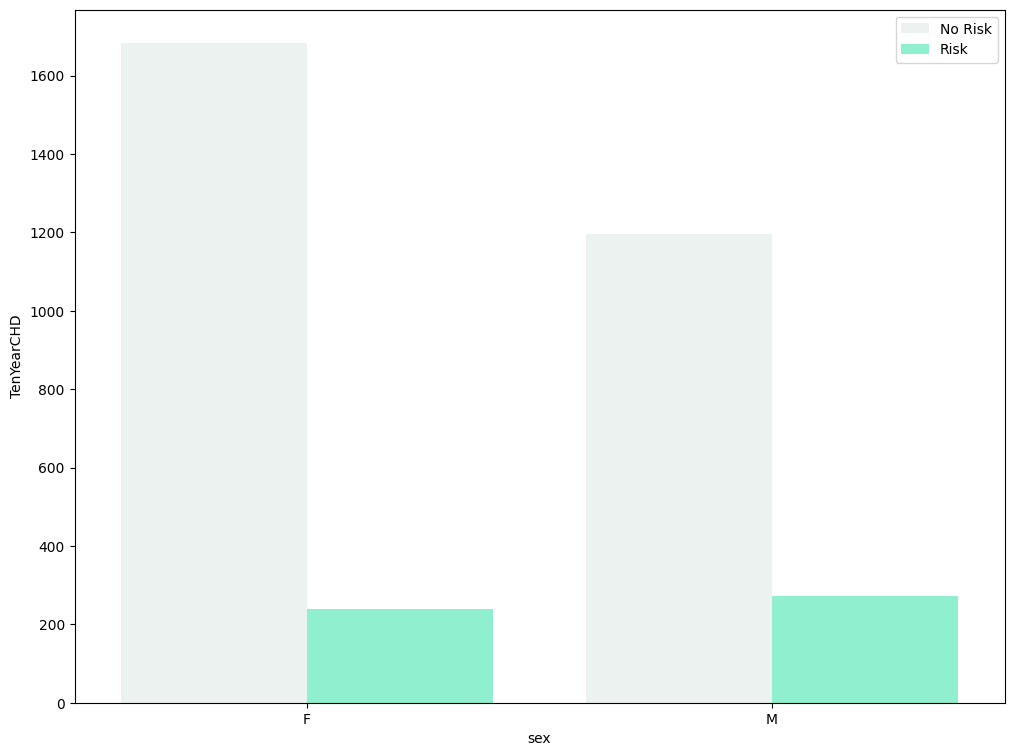

In [167]:
#Count for TenYearCHD vs sex
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x='sex',color='aquamarine',hue='TenYearCHD')
plt.legend(["No Risk", "Risk"])
plt.ylabel('TenYearCHD')

### We can see that there is there is a slight more chances of higher TenYearCHD in males according to the given dataset.

## Effect of smoking on CHD

In [168]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['is_smoking'].value_counts()

YES    275
NO     236
Name: is_smoking, dtype: int64

Text(0, 0.5, 'TenYearCHD')

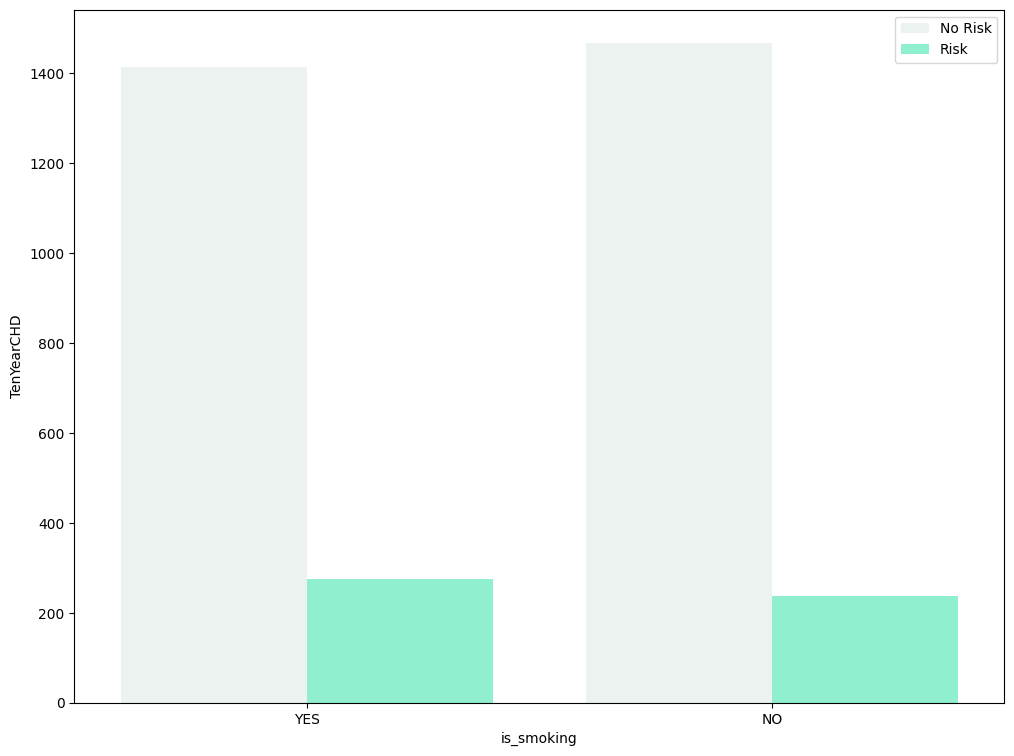

In [169]:
#Count for TenYearCHD vs sex
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x='is_smoking',color='aquamarine',hue='TenYearCHD')
plt.legend(["No Risk", "Risk"])
plt.ylabel('TenYearCHD')

### We can see that there is a slight increase in CHD risk for smoking individuals. 

## Blood pressure medication affect on CHD risk factor

In [170]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['BPMeds'].value_counts()

0.0    471
1.0     33
Name: BPMeds, dtype: int64

Text(0.5, 1.0, 'Distribution of positive case over different categories of BPMeds')

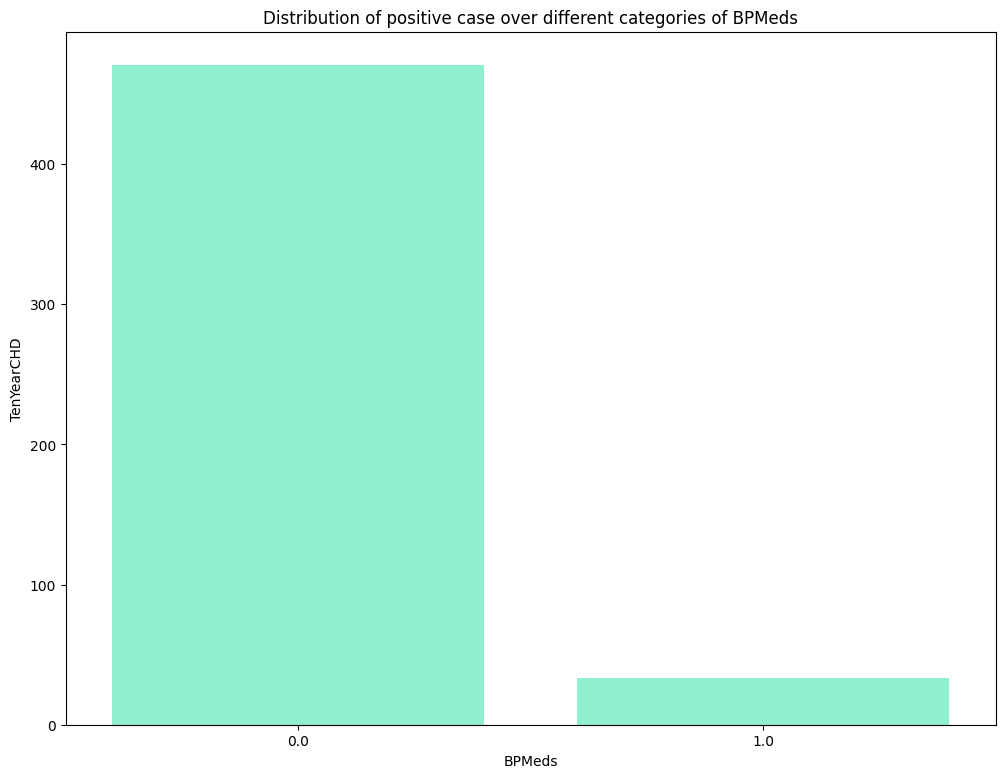

In [171]:
#Count for TenYearCHD vs BPMeds 
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['BPMeds'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of BPMeds')

### We can see that people who are taking BP medication have slightly higher TenYearCHD.

## Does previous strokes affect future CHD risk?

In [172]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentStroke'].value_counts()

0    501
1     10
Name: prevalentStroke, dtype: int64

Text(0.5, 1.0, 'Distribution of positive case over different categories of prevalentStroke')

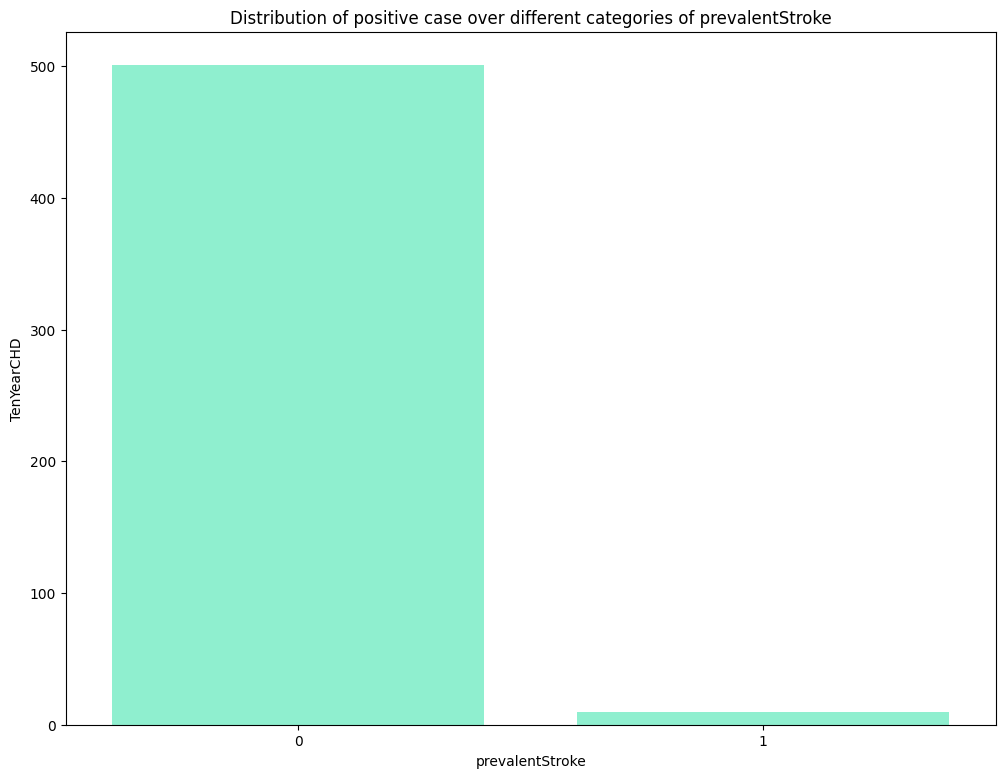

In [173]:
#Count for TenYearCHD vs prevalentStroke
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentStroke'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of prevalentStroke')

### We can see that people with previous stroke are having slighter higher TenYearCHD

## Does hypertention affect the chances of higher TenYearCHD?

In [174]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentHyp'].value_counts()

0    256
1    255
Name: prevalentHyp, dtype: int64

Text(0.5, 1.0, 'Distribution of positive case over different categories of prevalentHyp')

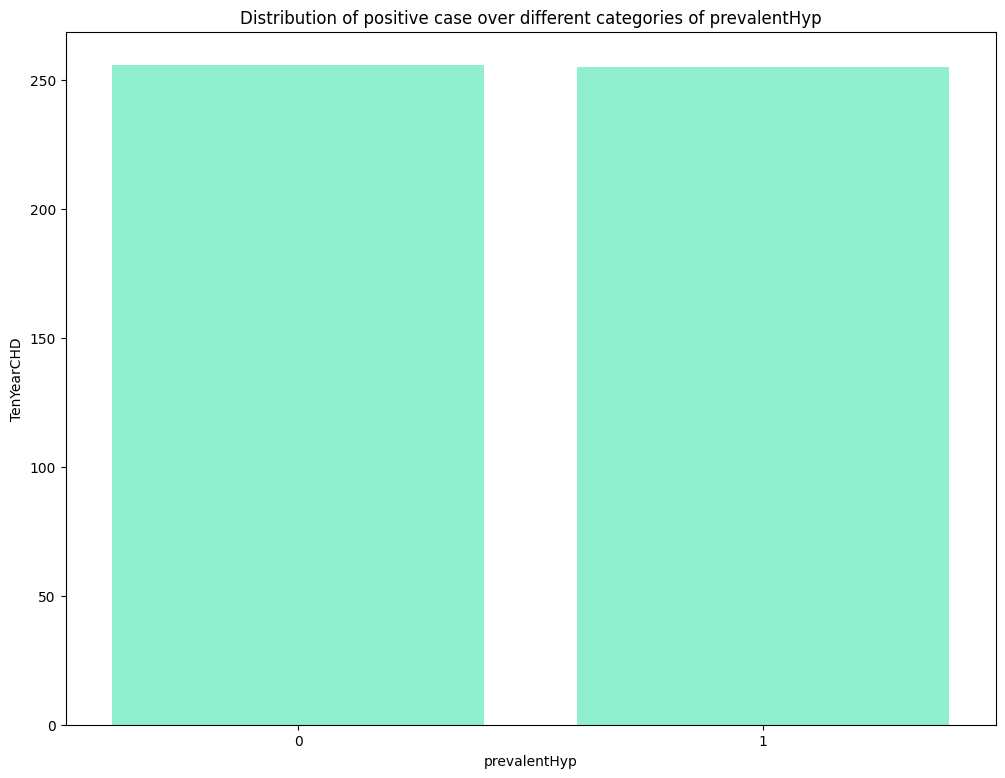

In [175]:
#Count for TenYearCHD vs prevalentHyp	
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentHyp'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of prevalentHyp')

### We can see that hypertension increases the chances of TenYearCHD by a major factor.

## Effect of Diabeties on TenYearCHD

In [176]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['diabetes'].value_counts()

0    478
1     33
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Distribution of positive case over different categories of diabetes')

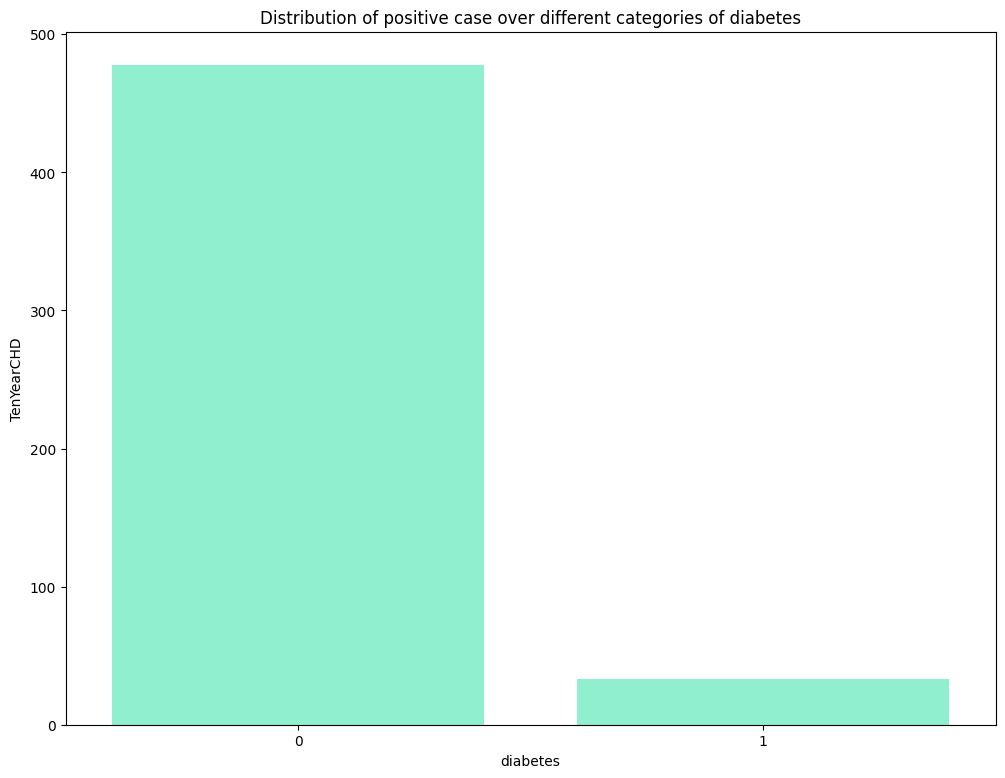

In [177]:
#Count for TenYearCHD vs diabetes	
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['diabetes'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of diabetes')

### We can see that there is slightly higher TenYearCHD for individuals with diabetes.

# **Lineplots for the continious variables totChol,sysBP,diaBP,BMI,heartRate,glucose for positive cases of TenYearCHD**

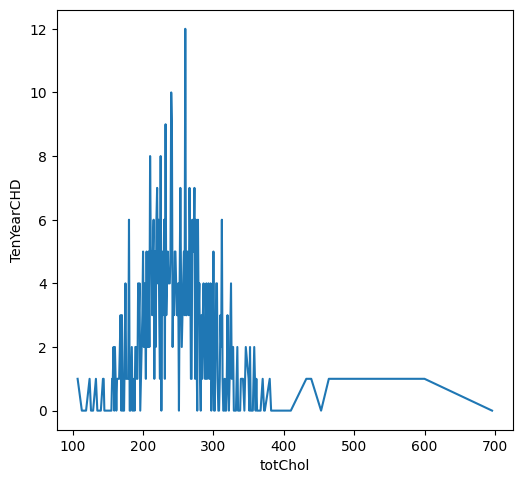

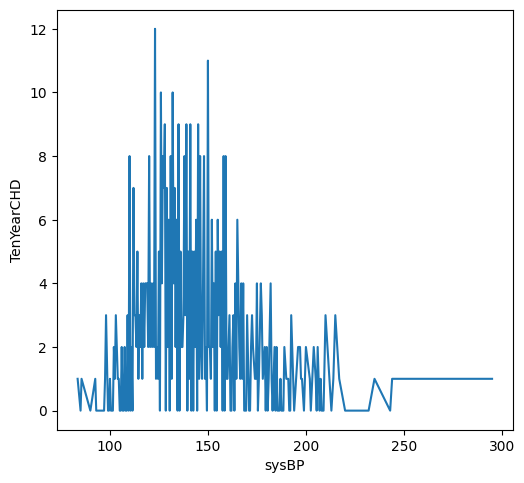

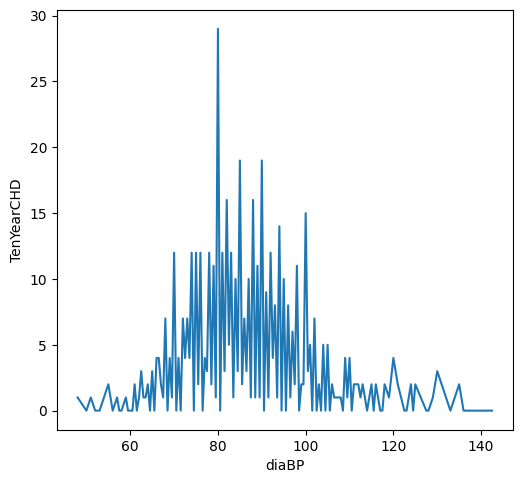

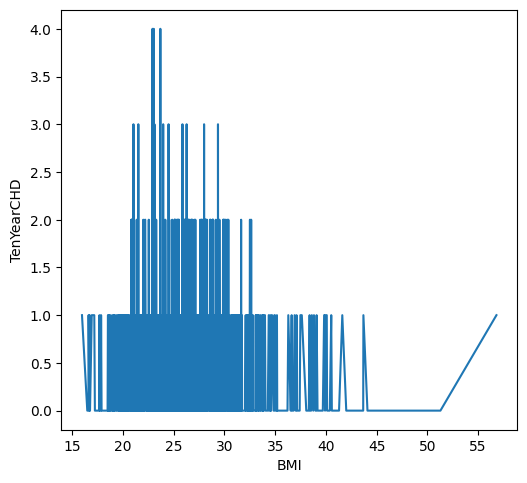

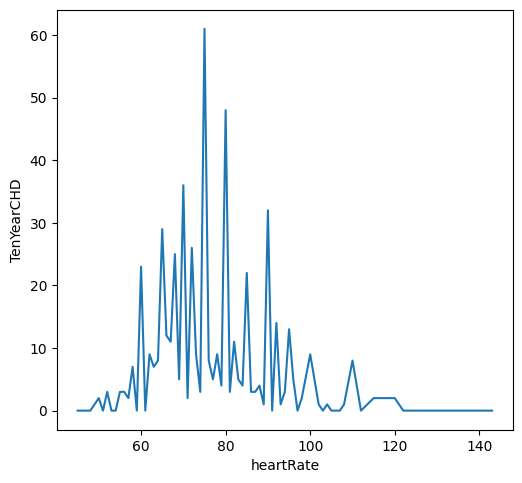

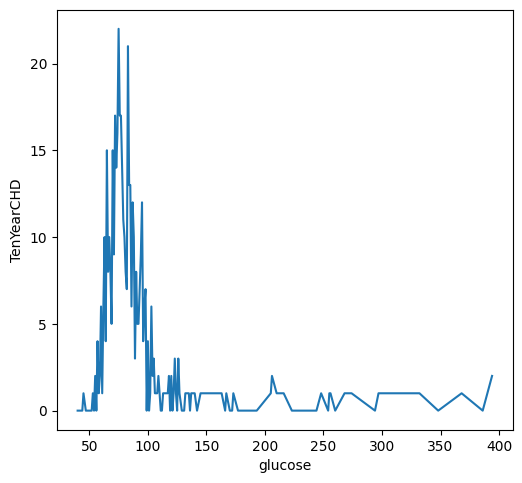

In [178]:
continious_variable_med_list = ['totChol','sysBP','diaBP','BMI','heartRate','glucose']
for index,value in enumerate(continious_variable_med_list):
  plt.figure(figsize=(20,12))
  plt.subplot(2,3,index+1)
  temp=data=cardiovascular_risk_pred.groupby(value)['TenYearCHD'].sum().reset_index()
  sns.lineplot(data=temp,x=value,y='TenYearCHD')

## **From the visualisations we can see that for all these variables, most of the positive cases are for the medium range, this is because the dataset mostly contains people with medium ranges for these variables. In theory, consistent high and low values for all these variables are dangerous and can have an increasing effect on the CHD risk factor.**

## **The medium ranges for all these variables according to our data are:**

* Total cholestrol: 170-310
* Systolic blood pressure: 100-180
* Diastolic blood pressure: 70-100
* BMI: 20-32
*cHeart rate: 60-95
* Glucose: 50-110

# **Data Cleaning**

## **Handling Null Values**


###Missing data is are values or data which has not been stored in the given dataset.

###Missing values can bais the results of the machine learning models or reduce the accuracy of the model.

### Therefore it is essential to remove null values from the dataset before training the model.

In [179]:
#Checking for null values
cardiovascular_risk_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [180]:
cardiovascular_risk_pred.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

### Since the glucose column has a lot of null values, I'll impute them with the mean glucose value. After this, the number of null values present will be of a very small order when compared to the size of the dataset, therefore I'll just delete them.

In [181]:
#Impluting mean value of glucose in null values of glucose
mean_glucose=int(cardiovascular_risk_pred['glucose'].mean())
cardiovascular_risk_pred['glucose'].fillna(mean_glucose,inplace=True)

In [182]:
#Deleting rest of the null values
cardiovascular_risk_pred.dropna(inplace=True)

In [183]:
#Checking for null values
cardiovascular_risk_pred.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### There are no null values, hence we can move forward

## **Handling Dulicate values**

In [184]:
cardiovascular_risk_pred.duplicated().sum()

0

### We can see that there are no duplicated values, so we can move ahead.

# **Handling outliers**

In [185]:
#Creating a list of numerical values that can have outliers
possible_outliers_columns= ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

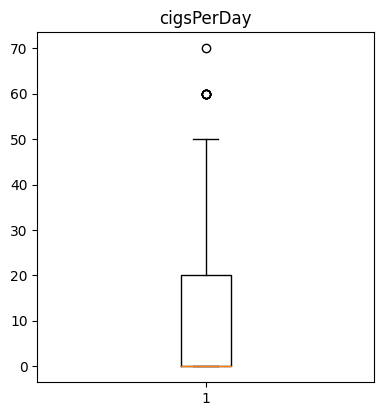

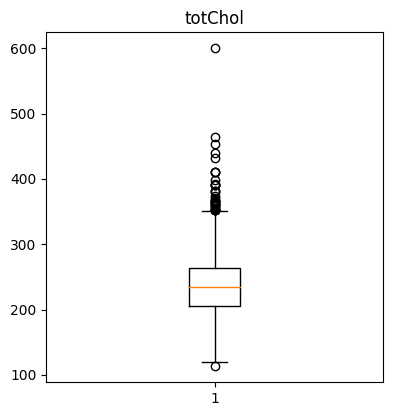

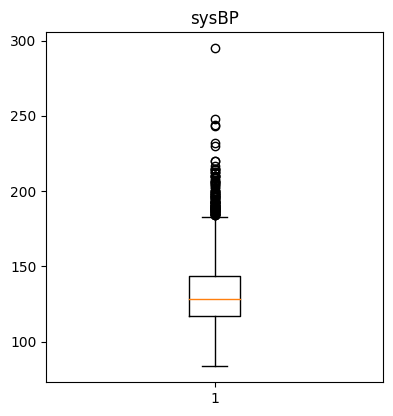

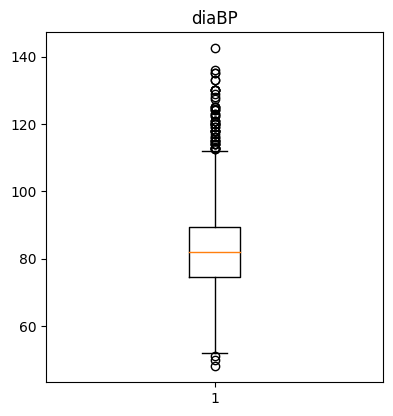

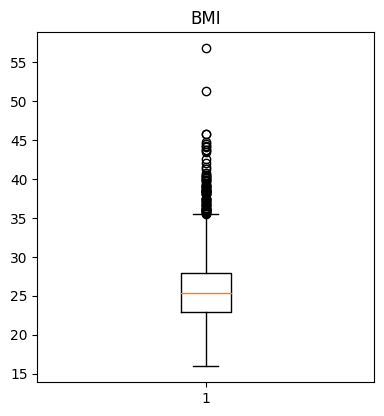

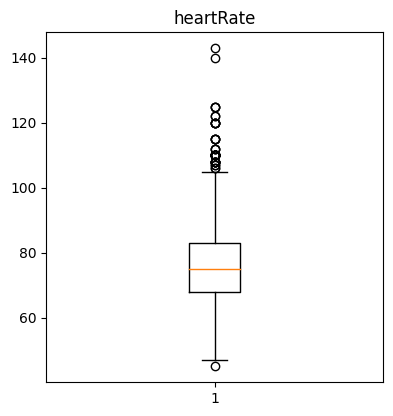

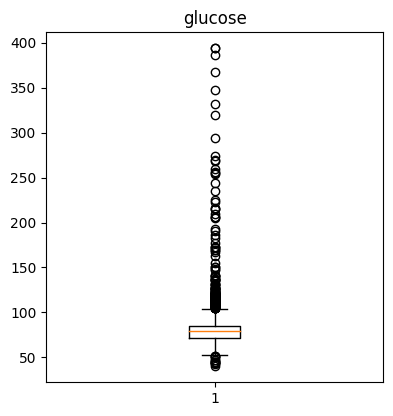

In [186]:
for index, value in enumerate(possible_outliers_columns):
  plt.figure(figsize=(20,10))
  plt.subplot(2,4,index+1)
  plt.boxplot(cardiovascular_risk_pred[value])
  plt.title(str(value))


### From the boxplot we can see that there are outliers in the data, but practically speaking even though they are not "normal" observations, they are still possible. Ruling out such possible scenerios can be harmful for our prediction.
### Therefore not removing outliers.

# **Feature Engineering**



## **Feature Encoding**
###Machine learning model only works with numerical values and hence important categorical values are converted into numerical variables.
###Here we have two columns that require encoding and they are "sex" and "is_smoking".

In [187]:
#Encoding for sex column
cardiovascular_risk_pred['sex']=cardiovascular_risk_pred['sex'].apply(lambda x: 1 if x=='M' else 0)
#Encoding for is_smoking column
cardiovascular_risk_pred['is_smoking']=cardiovascular_risk_pred['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [188]:
#Checking the encoding
cardiovascular_risk_pred.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


## **Grouping columns for better understanding**

###There are many columns in this dataset. Some of them can be combined to give a better column which actually gives out better and precise information, which would also impact the prediction in a positive way.

## **SmokeLevel**
###At first we can combine the is_smoking and cigsPerDay column. If a person has cigsPerDay value as something greater than 0, then it obviously means he is a smoker. In that case the column is_smoking would be of no value.

###Now I will combine both of these columns into a single column which would be an ordinal column called SmokeLevel that contains the level of smoking for each person.



In [189]:
#defining smoker function to return the smoking level for the individual
def smoke_level(cpd):
  if cpd==0:                    #Non smoker
    return 1
  elif cpd>0 and cpd<=10:       #Smoker with more than 0 and less than 10 cigs per day
    return 2
  elif cpd>10 and cpd<=20:      #Smoker with more than 10 and less than 20 cigs per day 
    return 3
  elif cpd>20 and cpd<=30:      #Smoker with more than 20 and less than 30 cigs per day
    return 4
  elif cpd>30 and cpd<=40:      #Smoker with more than 30 and less than 40 cigs per day
    return 5        
  else:                         #Smoker with more than 40 cigs per day
    return 6  

In [190]:
cardiovascular_risk_pred['Smokelevel']=cardiovascular_risk_pred['cigsPerDay'].apply(lambda x: smoke_level(x))

In [191]:
#Removing the is_smoking and cigPerDay
cardiovascular_risk_pred.drop(columns=['is_smoking','cigsPerDay'],inplace=True)

In [192]:
cardiovascular_risk_pred

,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Smokelevel
id,,,,,,,,,,,,,,,
1,36,4.0,1,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1
2,46,1.0,0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,2
3,50,1.0,1,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,64,1.0,0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,4
5,61,3.0,0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0,1
3385,60,1.0,0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,1
3386,46,1.0,0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,1


## **BPLevel**
### Next I will combine 'sysBP' and 'diaBP' to create a new columns called BP level.
### The image below explains how BP level is defined

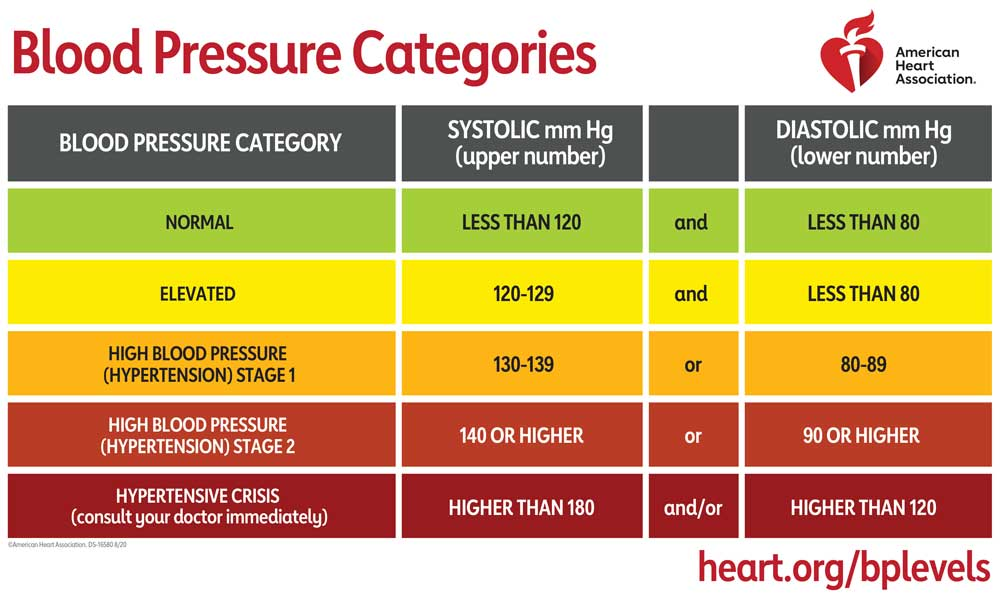

In [193]:
#A function that returns the Blood Pressure level by taking the Systolic blood pressure and Diastolic blood pressure as inputs
def BPlevel(s,d):
  if s<120 or d<80:                               #Normal level
    return 1
  elif (s>=120 and s<130) or d<80:                #Elevated level
    return 2
  elif (s>129 and s<140) or (d>79 and d<90):       #High BP stage 1
    return 3
  elif (s>139 and s<180) or (d<89 and d<120):      #High BP stage 2
    return 4
  elif s>179 or d>119:                             #Hypertensive crisis
    return 5                    

In [194]:
#Creating BPlevel column
cardiovascular_risk_pred['BPlevel']=cardiovascular_risk_pred.apply(lambda x: BPlevel(x['sysBP'],x['diaBP']),axis=1)

In [195]:
#droping the sysBP and diaBP columns
cardiovascular_risk_pred.drop(columns=['sysBP','diaBP'],axis=1,inplace=True)

In [196]:
#Checking for new columns
cardiovascular_risk_pred.head()

,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,Smokelevel,BPlevel
id,,,,,,,,,,,,,,
1,36,4.0,1,0.0,0,1,0,212.0,29.77,72.0,75.0,0,1,4
2,46,1.0,0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,2,1
3,50,1.0,1,0.0,0,1,0,233.0,28.26,68.0,94.0,1,3,3
4,64,1.0,0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,4,3
5,61,3.0,0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,1,5


## **DiabetesLevel**
### Atlast, I'll convert the "glucose" column to a column called "DiabetesLevel". This would enable us to remove the glucose column and the diabetes column.

###The below image shows how glucose relate to diabetes level

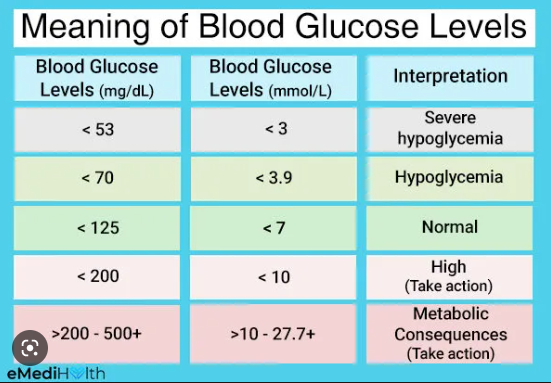

In [197]:
def diabetes(g):
  if g <53:                               #Severe Hypoglycemia
    return 1
  elif g>53 and g<70:                     #Hypoglycemia
    return 2
  elif g>70 and g<125:                    #Normal
    return 3
  elif g>125 and g<200:                   #Pre-Diabetic
    return 4
  elif g>200:                             #Severe-Diabetes
    return 5

In [198]:
#Creating a diabetic level
cardiovascular_risk_pred['DiabetesLevel']=cardiovascular_risk_pred['glucose'].apply(lambda x: diabetes(x))

In [199]:
#Removing columns diabetes and glucose
cardiovascular_risk_pred.drop(columns=['diabetes','glucose'],axis=1,inplace=True)

In [200]:
#Checking the columns
cardiovascular_risk_pred.head()

,age,education,sex,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,TenYearCHD,Smokelevel,BPlevel,DiabetesLevel
id,,,,,,,,,,,,,
1,36,4.0,1,0.0,0,1,212.0,29.77,72.0,0,1,4,3.0
2,46,1.0,0,0.0,0,0,250.0,20.35,88.0,0,2,1,3.0
3,50,1.0,1,0.0,0,1,233.0,28.26,68.0,1,3,3,3.0
4,64,1.0,0,0.0,0,0,241.0,26.42,70.0,0,4,3,3.0
5,61,3.0,0,0.0,0,1,272.0,32.80,85.0,1,1,5,2.0


##**Feature Removal**

##Checking for Correlation

<Axes: >

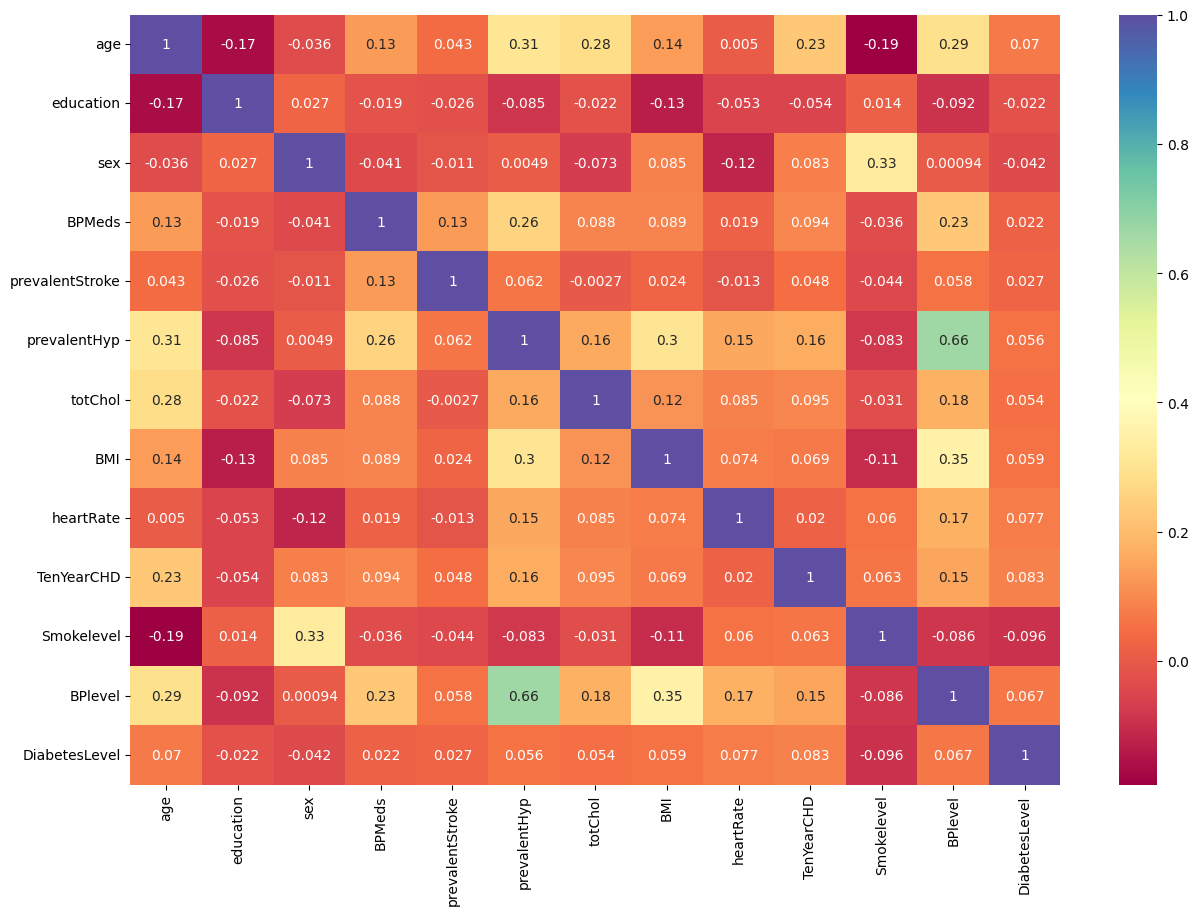

In [201]:
#plotting correlation matrix using heatmap plot
plt.figure(figsize=(15,10))
sns.heatmap(cardiovascular_risk_pred.corr(),annot=True,cmap='Spectral')

### We can see that there in no high correlation in our data. But we can see that there is a high correlation between prevalentHyp and BPlevel.
### Dropping the BPlevel.

In [202]:
#Removing the BPlevel
cardiovascular_risk_pred.drop('prevalentHyp',axis=1,inplace=True)

# **Pre Processing of data**

## **Dealing with class imbalance**
###A dataset is imbalanced if the classification categories are not approximately equally represented. This affects the quality of our machine larning model and also causes a mistake of classifying the minority class as the majority class. Therefore we will try to deal with this class imbalance if it exists in our dataset.

In [203]:
#Checking for class imbalance for the target variable
cardiovascular_risk_pred['TenYearCHD'].value_counts()

0    2714
1     475
Name: TenYearCHD, dtype: int64

###We can see that there is high class imbalance 
###Technique for resolve class imbalance-


### 1.Resampling(undersampling and oversampling)  
### 2.SMOTE
### 3.Using BalancedBaggingClassifier
###In this project I will be using SMOTE technique(synthetic minority oversampling technique)



## **SMOTE**

### Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases

In [204]:
#Dropping the Nan values after grouping
cardiovascular_risk_pred.dropna(inplace=True)
#Creating the dataset for independent and dependent data
x=cardiovascular_risk_pred.drop('TenYearCHD',axis=1)
y=cardiovascular_risk_pred['TenYearCHD']

In [205]:
#Droping eduction and id from y since it has no significance
x.reset_index(inplace=True)
x.drop(columns={'id','education'},inplace=True)

In [206]:
#Applying the smote technique to solve class imbalance
smote = SMOTE(sampling_strategy='minority')
x_sm , y_sm = smote.fit_resample(x,y)

In [210]:
#Checking for improvement in class imbalance after using SMOTE technique
y_sm.value_counts()

0    2602
1    2602
Name: TenYearCHD, dtype: int64

### As we can see, the class imbalance has been completely removed.

## **Splitting the data**

In [213]:
#Splitting the data
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.25,random_state=0)

##**Feature Scaling**

### Feature engineering is a technique to standardize the independent feature preset in the dataset.It is performed in feature engineering during pre-processing to handle highly varying magnitude or values or units.If feature scaling is not done higher values are given more importance and lower value are given lower value regardless of units.
###Ways to feature scale:
### * Min max normalization
### * Standardisation
###Using StandartScaler() function for this project.

In [214]:
#Creating object for the StandardScaler function
scaler = StandardScaler()

In [215]:
#Standardizing the dataset
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [216]:
#Overview of standardize dataset
x_train

array([[ 0.42875297, -0.78537797, -0.24261289, ..., -0.83532578,
         0.64227262,  0.28773107],
       [ 0.54685749,  1.27327228, -0.24261289, ...,  0.02604186,
         1.47564696, -0.60276176],
       [-1.22471022,  1.27327228, -0.24261289, ...,  0.8874095 ,
        -0.19110173,  0.28773107],
       ...,
       [-2.05144181, -0.78537797, -0.24261289, ..., -0.83532578,
        -1.02447607,  0.28773107],
       [-1.1066057 ,  1.27327228, -0.24261289, ...,  0.8874095 ,
        -1.02447607,  0.28773107],
       [ 0.664962  ,  1.27327228, -0.24261289, ..., -0.83532578,
         1.47564696,  0.28773107]])

# **Model Implementation**

###Machine learning models can be described as programs that are trained to find patterns or trends within data and predict the result for new data.

###In this project we are dealing with a classification problem, therefore we will be using classification models. 
###In this project we will be including the following models:

###Logistic regression.
### 1.Decision tree classifier.
### 2.Random forest classifier.
### 3.Gradient Boosting classifier.